**European Call Option Pricing Using Binomial Trees**

This notebook demonstrates European call option pricing using a discrete-time binomial tree. It implements backward induction to compute option values under the risk-neutral measure and explores parameter sensitivity to volatility, interest rate, and time to maturity. The notebook also compares binomial prices to the Black-Scholes formula, illustrating numerical convergence and accuracy. This implementation highlights discrete-time stochastic modeling, option sensitivity analysis, and practical derivative pricing techniques.

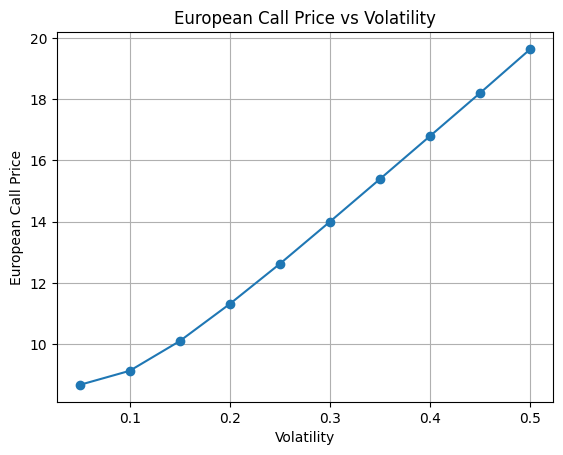

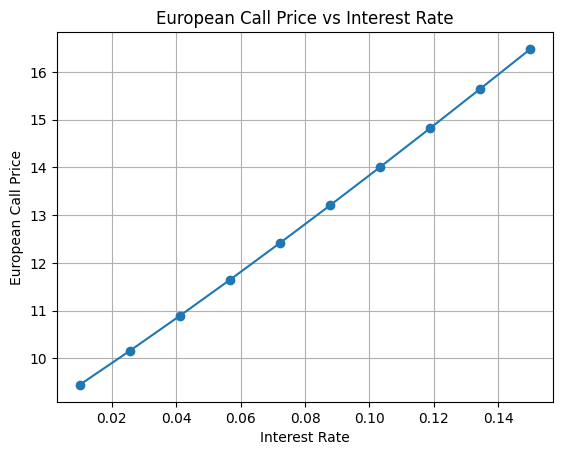

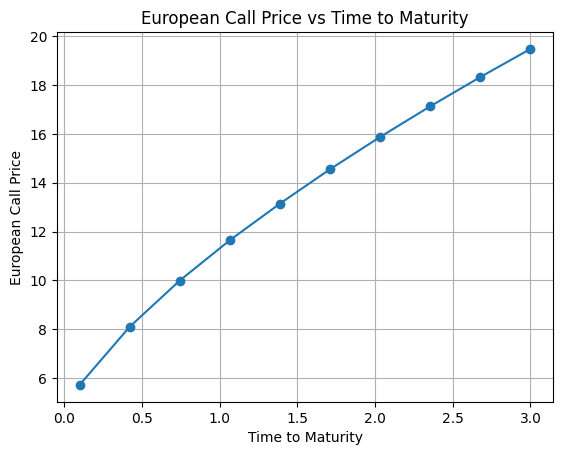

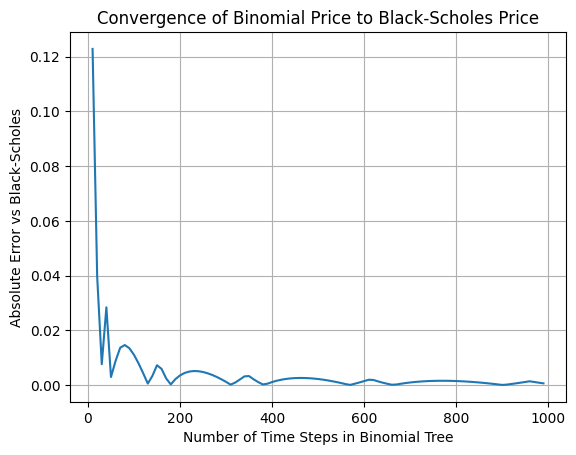

In [3]:
# -------------------------
# European Call Option Pricing using Binomial Tree
# -------------------------

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit

# -------------------------
# 1. European Call Binomial Pricing Function
# -------------------------
def bin_price_euro_call(S0, K, r, T, sigma, steps):
    """
    Compute the European call option price using a recombining binomial tree.

    Parameters:
    S0 : float - initial stock price
    K : float - strike price
    r : float - risk-free rate
    T : float - time to maturity
    sigma : float - volatility
    steps : int - number of discrete time steps in the tree

    Returns:
    option_price : float - European call option price
    """
    t_i = T / steps                     # time increment per step
    u = np.exp(sigma * np.sqrt(t_i))    # up factor per step
    d = 1 / u                            # down factor per step
    p = (np.exp(r * t_i) - d) / (u - d) # risk-neutral probability

    # -------------------------
    # Build the stock price tree
    # -------------------------
    stock_price = np.zeros((steps+1, steps+1))
    for i in range(steps+1):
        for j in range(i+1):
            # Stock moves up (i-j) times and down (j) times
            stock_price[j, i] = S0 * (u ** (i-j)) * (d ** j)

    # -------------------------
    # Initialize option payoff at maturity
    # -------------------------
    option_price = np.zeros((steps+1, steps+1))
    for i in range(steps+1):
        for j in range(i+1):
            option_price[j, i] = max(stock_price[j, i] - K, 0)  # European call payoff

    # -------------------------
    # Backward induction to compute option price at t=0
    # -------------------------
    for i in range(steps-1, -1, -1):
        for j in range(i+1):
            # Discounted expected value under risk-neutral measure
            option_price[j, i] = np.exp(-r * t_i) * (p * option_price[j, i+1] + (1-p) * option_price[j+1, i+1])

    return option_price[0, 0]

# -------------------------
# 2. Black-Scholes Formula (for comparison)
# -------------------------
def black_scholes_euro_call(S0, K, r, T, sigma):
    """
    Closed-form European call option price using Black-Scholes formula
    """
    d1 = (np.log(S0/K) + (r + 0.5*sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S0 * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)

# -------------------------
# 3. Define Parameters
# -------------------------
S0 = 80       # Initial stock price
K = 75        # Strike price
r = 0.05      # Risk-free interest rate
sigma = 0.2   # Volatility
T = 1         # Time to maturity in years
steps = 200   # Number of time steps in binomial tree

# -------------------------
# 4. Sensitivity Analysis
# -------------------------

# 4a: Sensitivity to volatility
sigspace = np.linspace(0.05, 0.5, 10)
call_prices_sigma = [bin_price_euro_call(S0, K, r, T, sigma_i, steps) for sigma_i in sigspace]

plt.plot(sigspace, call_prices_sigma, marker='o')
plt.xlabel('Volatility')
plt.ylabel('European Call Price')
plt.title('European Call Price vs Volatility')
plt.grid(True)
plt.show()

# 4b: Sensitivity to interest rate
rspace = np.linspace(0.01, 0.15, 10)
call_prices_r = [bin_price_euro_call(S0, K, r_i, T, sigma, steps) for r_i in rspace]

plt.plot(rspace, call_prices_r, marker='o')
plt.xlabel('Interest Rate')
plt.ylabel('European Call Price')
plt.title('European Call Price vs Interest Rate')
plt.grid(True)
plt.show()

# 4c: Sensitivity to time to maturity
Tspace = np.linspace(0.1, 3, 10)
call_prices_T = [bin_price_euro_call(S0, K, r, T_i, sigma, steps) for T_i in Tspace]

plt.plot(Tspace, call_prices_T, marker='o')
plt.xlabel('Time to Maturity')
plt.ylabel('European Call Price')
plt.title('European Call Price vs Time to Maturity')
plt.grid(True)
plt.show()

# -------------------------
# 5. Convergence Analysis vs Black-Scholes
# -------------------------
range_num_steps = np.arange(10, 1000, 10)  # test increasing number of steps
error_values = []

for steps_i in range_num_steps:
    bin_price = bin_price_euro_call(S0, K, r, T, sigma, steps_i)
    bs_price = black_scholes_euro_call(S0, K, r, T, sigma)
    error_values.append(np.abs(bin_price - bs_price))

plt.plot(range_num_steps, error_values)
plt.xlabel('Number of Time Steps in Binomial Tree')
plt.ylabel('Absolute Error vs Black-Scholes')
plt.title('Convergence of Binomial Price to Black-Scholes Price')
plt.grid(True)
plt.show()
